In this module we are performing EDA analysis on White wine data


In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import warnings#ignore warnings
warnings.filterwarnings('ignore')

Read the white wine data

In [2]:
white_wine_data = pd.read_csv("https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-white.csv",sep=";")

1.Head
To take a closer look at the data, we take the help of “ .head()” function of pandas library which returns the first five observations of the data set. Similarly, “.tail()” returns last five observations of the data set.

In [3]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**2**. Shape Find out the total number of rows and columns in the dataset using “.shape”.

In [4]:
white_wine_data.shape

(4898, 12)

**Observations**
*   Dataset comprises of 4898(observations)rows and 12 features(coloumns).
*   Out of 12, 1 variable is target variable and rest 11 are input variables.



**3**.Get the statistical overview of the data using Describe function of pandas library.This returs the mean,count,standard deviation,min,max and quantile details of the data.

In [5]:
white_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Lets explore the different statistical measures that we got from describe
Note: 25%, 50%, and 75% are nothing but corresponding percentile values

*   count: total count of non-null values in the column
*   mean: the average of all the values in that column
*   min: the minimum value in the column
*   max: the maximum value in the column
*   25%: first quartile in the column after we arrange those values in ascending order
*   50%: this is the median or the second quartile
*   75%: the third quartile
*   std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material) 











**Observations:**

* There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile) 
* Thus, the observation suggest that there are extreme values i.e Outliers in our dataset. 

Exploring the Features/variables
All the column names in the Dataset is variables

In [6]:
white_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Target Variable**
*   The target variable of the dataset is the feature of the dataset.It is the variable that is,or should be the output
*   Here **quality** is the target variable as we're trying to know which of the two types of wines have better quality.



**Input Variable**
*   One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.
*   In our example, the input variables are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', and 'alcohol'
*   All of these will help us predict the quality of the wine.





Unique Values of Quality(Target Variable)

In [7]:
white_wine_data['quality'].unique()#Display the unique values of quality column

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
white_wine_data['quality'].nunique()#Returns the number of unique values of the column quality

7

**Observations**
*   Target/Dependent Variable is Discrete and categorical in nature
*   'quality' score scale ranges from 1 to 10,1 is poor and 10 being the best.
*   1,2 and 10 Quality ratings are not given by any observations.Only scores are given in the range of 3 to 9.





Frequency Counts of each 'quality' value


In [9]:
white_wine_data['quality'].value_counts()#counts the occurance of each value in the column

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

**Observations**
*   Most of the values lies in the categories of 6,5,7,8 and 4
*   only few observations are made for the categorical range of 3 and 9



Renaming the Columns

In [10]:
white_wine_data.rename(columns= {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
      'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',},inplace=True)
white_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Checking for Missing Values

In [11]:
white_wine_data.isna()#returns the dataframe with boolean values indicating missing values.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
white_wine_data.isna().sum()#returns the number of missing values in each column

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Observation**  There are no missing values present in any of the columns

Display the  information about the data frame including the data types of each column, number of null values in each column and memory usage of the entire data using Info() function.

In [13]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Observations**
*   The Data has only float and integer values
*   There are no missing values



Checking for the Duplicates

*   Duplicates might or might not affect the quality of data. Before deciding if they should be removed, it is essential to understand why they might have occurred in the first place.



In [14]:
duplicate = white_wine_data[white_wine_data.duplicated()]
duplicate.shape

(937, 12)

**Observations**
*   There are 937 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.




**Data visualization pr graphical Representaion**

In [15]:
#importing the libraries related to graphicalrepresentation
import matplotlib.pyplot as plt
import seaborn as sns

Seperate the Target and input Variables

In [16]:
Y = white_wine_data["quality"]
X = white_wine_data.drop(white_wine_data['quality'],inplace = True)


*   X contains all the features except the 'quality' coloumn
*   Y has the Quality coloumn

Let's plot a histogram now! On calling the hist( ) method on a DataFrame, you'll get histograms for all the Series.

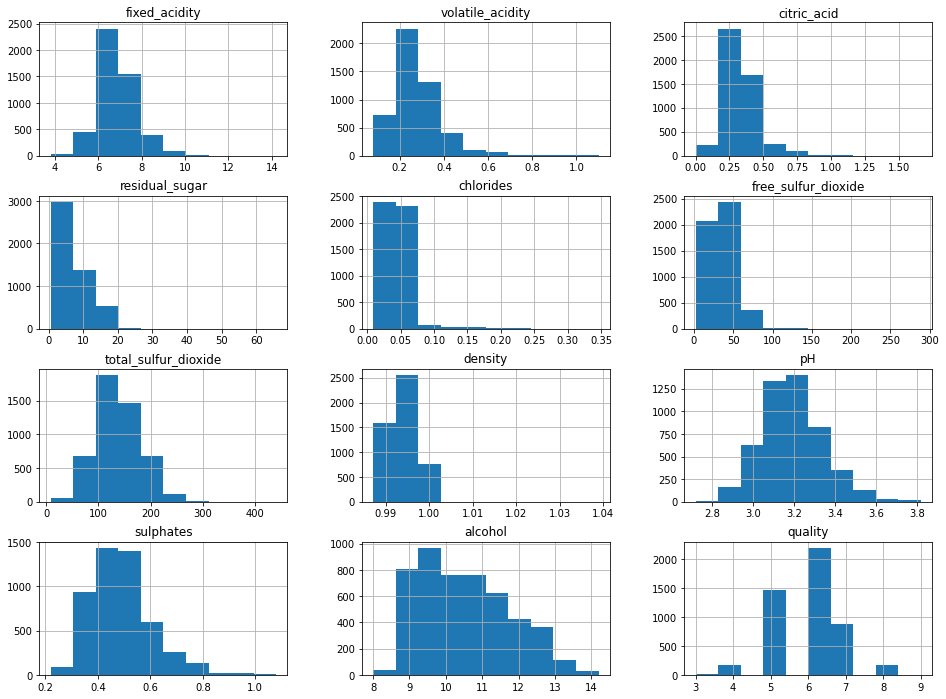

In [17]:
white_wine_data.hist(bins=10,figsize=(16,12))
plt.show()

**Observations:**

* The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
* The attributes 'total sulpur dioxide' and 'pH' are quite normally distributed.
* Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

**Correlation Matrix with Heatmap**

**Correlation:**

Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.



We can check how each feature is related to others using corr() function

In [18]:
white_wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022366,0.288829,0.089149,0.022989,-0.049570,0.091279,0.265445,-0.426286,-0.016802,-0.121114,-0.113802
volatile_acidity,-0.022366,1.000000,-0.149342,0.064405,0.070619,-0.096878,0.089528,0.027241,-0.031950,-0.035923,0.067778,-0.194719
citric_acid,0.288829,-0.149342,1.000000,0.094425,0.114417,0.094170,0.121370,0.149626,-0.163895,0.062393,-0.075983,-0.009210
residual_sugar,0.089149,0.064405,0.094425,1.000000,0.088717,0.298749,0.401353,0.838904,-0.193489,-0.026417,-0.450448,-0.097735
chlorides,0.022989,0.070619,0.114417,0.088717,1.000000,0.101321,0.198795,0.257276,-0.090517,0.016955,-0.360216,-0.209989
free_sulfur_dioxide,-0.049570,-0.096878,0.094170,0.298749,0.101321,1.000000,0.615436,0.294107,-0.000242,0.059440,-0.250230,0.008171
total_sulfur_dioxide,0.091279,0.089528,0.121370,0.401353,0.198795,0.615436,1.000000,0.529914,0.002633,0.134951,-0.448902,-0.174857
density,0.265445,0.027241,0.149626,0.838904,0.257276,0.294107,0.529914,1.000000,-0.093109,0.074926,-0.780102,-0.307434
pH,-0.426286,-0.031950,-0.163895,-0.193489,-0.090517,-0.000242,0.002633,-0.093109,1.000000,0.155987,0.121290,0.099449
sulphates,-0.016802,-0.035923,0.062393,-0.026417,0.016955,0.059440,0.134951,0.074926,0.155987,1.000000,-0.017731,0.053769


Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. We can do that using Seaborn's Heatmap function.

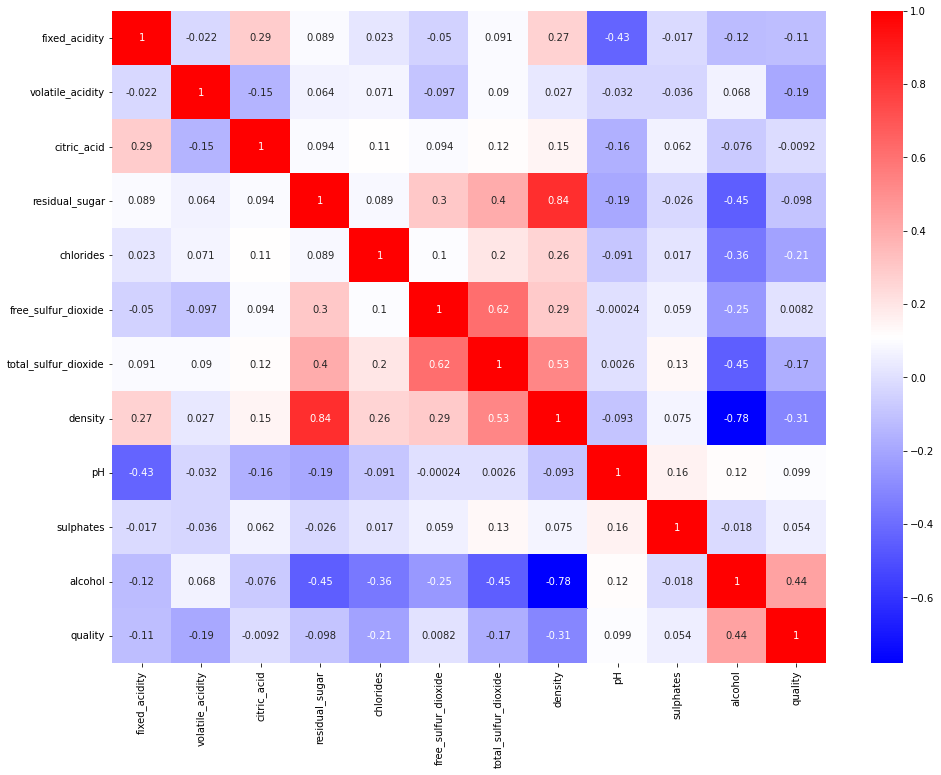

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(white_wine_data.corr(),cmap='bwr',annot=True)

**Observations:**

* Alcohol has the highest positive correlation with wine quality.
* There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
* There is a relatively high negative correlation between fixed_acidity and pH.
* Density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.
* citric acid & volatile acidity have negative correlation.
* free sulphur dioxide & total sulphur dioxide have positive correlation.

**Pair Plot**

The pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

It plots every numerical attribute against every other.

pairplot function of seaborn helps to achieve this

In [ ]:
sns.pairplot(white_wine_data)

The correlation between fixed_acidity and citric_acid is 0.288829. (you could find this value under the correlation matrix).


Looking at scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed.

**Box Plot**

A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

It displays the five-number summary of a set of data. The five-number summary is:
1. minimum
2. first quartile (Q1)
3. median
4. third quartile (Q3)
5. maximum

In [ ]:
sns.boxplot(white_wine_data['quality'],white_wine_data['alcohol'],palette='GnBu_d')
plt.title("Boxplot of quality and alcohol")
plt.show()

**Observation:**

* The above plot shows the increase in the quality of wine with an increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.
* Also, the points lying outside the whiskers(the lines extending from the rectangular box) are the outliers.

In [ ]:
#Grouping the wine based on grade
# Defining 'grade' of wine

#Good wine
white_wine_data['grade'] = 1 

#Bad wine
white_wine_data.grade[white_wine_data.quality < 6.5] = 0 

#set plotsize and colors
plt.figure(figsize = (6,6))
colors = ['lightcoral', 'rosybrown']

labels = white_wine_data.grade.value_counts().index
plt.pie(white_wine_data.grade.value_counts(), autopct='%1.1f%%',colors=colors)
plt.legend(labels, loc="Best")
plt.axis('equal')
plt.title('White Wine Quality Distribution')
plt.show()
#Show mean quality of white wine and quality distribution

print('The amount of good quality white wine is ',round(white_wine_data.grade.value_counts(normalize=True)[1]*100,1),'%.')
print("mean white wine quality = ",white_wine_data["quality"].mean())

In [ ]:
# plot to see how pH is varying in the grade of white wine
plt.figure(figsize=(6,6))
ax = sns.lineplot(x="pH", y="quality", hue="grade", data=white_wine_data,markers=True)